# Titanic Deep Learning TensorFlow Solution

**1. Introduction**

**2. Importing relevant libraries**
   
**3. Loading raw data**
   
**4. Primary analysis**
   
**5. Exploratory Data Analysis (EDA)**

Categrical data
   * 5.1 Survived
   * 5.2 Sex
   * 5.3 Pclass
   * 5.4 Embarked
        
        
Numerical data
   * 5.5 Age
   * 5.6 Fare
   * 5.7 SibSp
   * 5.8 Parch
   
**6. Further processing and filling missing values**
   * 6.1 Age
   * 6.2 Name / Title
   * 6.3 Family (SibSp and Parch)

**7. Data Encoding**
   * 7.1 Dropping data
   * 7.2 Create dummies
   * 7.1 Some visualisations after transformations
   * 7.1 Train Test Split
   * 7.1 Scaling data
   
**8. Creating the model**

**9. Training the model**

**10. Model Evaluation**

**11. Final Predictions**

**12. Preparing Submission File**


# 1. Introduction

https://www.kaggle.com/competitions/titanic

We are given two datasets: train.csv and test.csv to train and make predictions

Below are the columns we have in our datasets:

- **PassengerId:**  Unique ID of passenger aboard the ship
- **Survived:**  0 = No, 1 = Yes (Only in the training data)
- **Pclass:**  Ticket class (1,2,3)
- **Name:**  Name of the passenger
- **Sex:**  male, female
- **Age (in years)**
- **SibSp:**  # of siblings / spouses aboard the Titanic	
- **Parch:**  # of parents / children aboard the Titanic	
- **Ticket:**  Ticket number	
- **Fare:**  Passenger fare	
- **Cabin:**  Cabin number	
- **Embarked:**  Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# 2. Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set()

# 3. Loading raw data

In [2]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

all_data = pd.concat([raw_train,raw_test])

# 4. Primary analysis

In [3]:
print ('All data shape is ', all_data.shape )
print ('Training data shape is ', raw_train.shape )
print ('Test data shape is ', raw_test.shape )

All data shape is  (1309, 12)
Training data shape is  (891, 12)
Test data shape is  (418, 11)


In [4]:
display(raw_train.head())
raw_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


From the above tables:  
- 'Survived', 'Pclass', 'Sex' and 'Embarked' are categorical features. 
- 'Ticket' and 'Name' features could provide some useful information.

In [5]:
# Let's check the data for the missing values
raw_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Let's convert this Series to be in term of percentage of the total DataFrame
100* raw_train.isnull().sum()/len(raw_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

- Column 'Cabin' has 77% null values (687) so we will drop it
- Column 'Age' has 19,86% null values (177) so we will try to fill the null values
- Column Embarked' has 2 null values so we will drop these 2 rows

In [7]:
# Let's check the test set
raw_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# We will drop column 'Cabin' and fill null values in 'Age' and 'Fare' column

In [9]:
# Dropping columns: 'Cabin' from train and test set
# Dropping 2 null values from 'Embarked' from train set

#Creating new df
train = raw_train.copy()
test = raw_test.copy()

# From train data
train = train.drop(['Cabin'], axis=1)
train = train.dropna(axis=0, subset=['Embarked'])

# From test data
test = test.drop(['Cabin'], axis=1)

In [10]:
# Replacing default ID with PassengerID

#Since there are no null values in passenger ID we can directly use it as default ID
#setting PassengerId as the Id
train.set_index('PassengerId',inplace=True)
test.set_index('PassengerId',inplace=True)

# 5. Exploratory Data Analysis (EDA)

 * Categrical data
      * 5.1 Survived
      * 5.2 Sex
      * 5.3 Pclass
      * 5.4 Embarked
        
        
  * Numerical data
       * 5.5 Age
       * 5.6 Fare
       * 5.7 SibSp
       * 5.8 Parch

## Categorical data

### 5.1 Survived

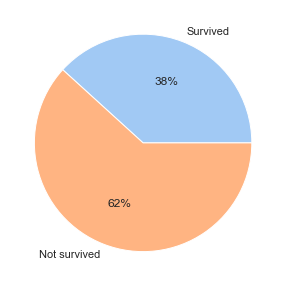

In [11]:
#How many people survived overall

#define data
a = train['Survived'].value_counts()[0]
b = train['Survived'].value_counts()[1]
data = [b,a]
labels = ['Survived', 'Not survived']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(5, 5))

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Survival rate is 61,6%, so the blind guess will give us around 62% accuracy when we bet on 'not survived'.
- Our model must be significantly better than 62% accuracy!

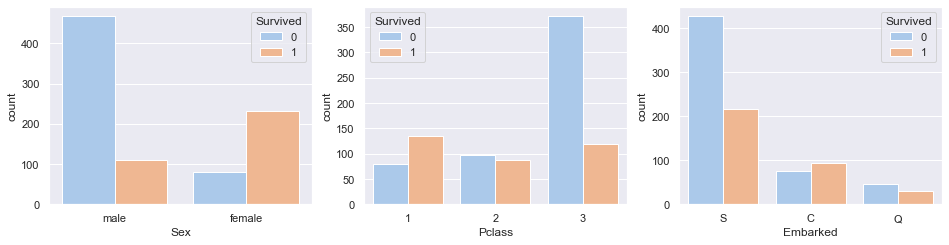

In [12]:
# Set a categorical feature list for visualization

c_list = ['Sex','Pclass','Embarked']

# Set suitable figure size and plot figures

fig = plt.figure(figsize = (16,8))

for i in range(len(c_list)):
    column = c_list[i]
    sub = fig.add_subplot(2,3,i + 1)
    chart = sns.countplot(data = train, x = column, hue = 'Survived', palette = 'pastel' )

- Much more females survived than males.
- Only in the 1st class more people survived.
- More passengers embarked in C survived.

### 5.2 Sex

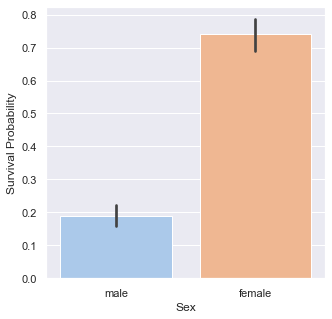

In [13]:
plt.figure(figsize=(5, 5))

g = sns.barplot(x='Sex',y='Survived',data=train, palette = 'pastel')
g = g.set_ylabel('Survival Probability')

- Male have less chance to survive than Female.
- It looks like that Sex plays an important role in the prediction of the survival.

### 5.3 Pclass

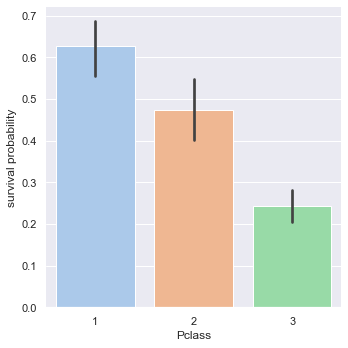

In [14]:
# Explore Pclass vs Survived
g = sns.catplot(x='Pclass',y='Survived',data=train,kind='bar', height = 5 , palette = 'pastel')
g.despine(left=True)
g = g.set_ylabels('survival probability')

It's clear that higher class passengers have more chance to survive.

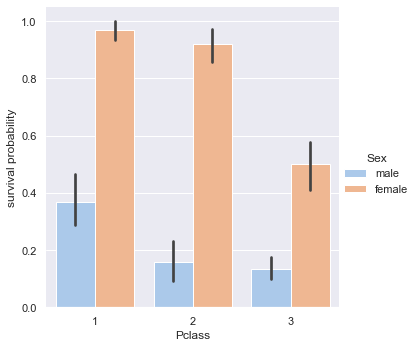

In [15]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train,
                   height=5, kind='bar', palette='pastel')
g.despine(left=True)
g = g.set_ylabels('survival probability')

- Being a female and 1st class passenger gives us almost a 100% chance to survive.
- The trend is obvious: higher class passengers have more chance to survive and being a woman gives a great advantage.

In [16]:
#Let's create a new data frame for famale 1st class passengers
train_female1 = train.copy()

# Keep only females
train_female1 = train_female1.loc[train_female1['Sex'] == 'female']
# ... and 1st class passengers
train_female1 = train_female1.loc[train_female1['Pclass'] == 1]
train_female1.shape

(92, 10)

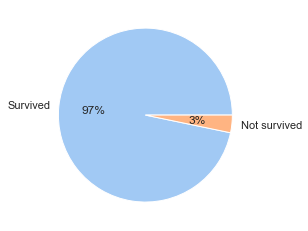

In [17]:
#How many famale 1st class passengers survived

#define data
a = train_female1['Survived'].value_counts()[0]
b = train_female1['Survived'].value_counts()[1]
data = [b,a]
labels = ['Survived', 'Not survived']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(4, 4))

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [18]:
#Let's check who didn't survive

#Let's create a new data frame for famale 1st class passengers who didn't survive
train_female10 = train_female1.copy()

train_female10 = train_female10.loc[train_female10['Survived'] == 0]
train_female10

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C
298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S


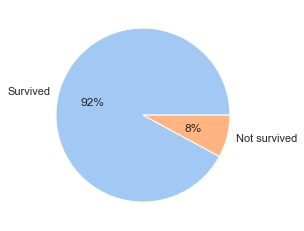

In [19]:
#Let's create a new data frame for famale 2st class passengers
#Creating new df
train_female2 = train.copy()

# Keep only females
train_female2 = train_female2.loc[train_female2['Sex'] == 'female']
# ... and 1st class passengers
train_female2 = train_female2.loc[train_female2['Pclass'] == 2]
train_female2.shape

#How many famale 1st class passengers survived

#define data
a = train_female2['Survived'].value_counts()[0]
b = train_female2['Survived'].value_counts()[1]
data = [b,a]
labels = ['Survived', 'Not survived']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(4, 4))

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [20]:
#Let's check who didn't survive

#Let's create a new data frame for famale 2st class passengers who didn't survive
train_female20 = train_female2.copy()

train_female20 = train_female20.loc[train_female20['Survived'] == 0]
train_female20

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0,S
200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,S
313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0,S
358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0,S
773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,S
855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0,S


### 5.4 Embarked

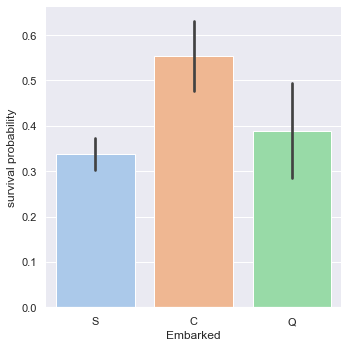

In [21]:
# Explore Embarked vs Survived 
g = sns.catplot(x='Embarked', 
                y='Survived',  
                data=train,
                height=5, kind='bar', palette='pastel')
g.despine(left=True)
g = g.set_ylabels('survival probability')

## Explore numerical data

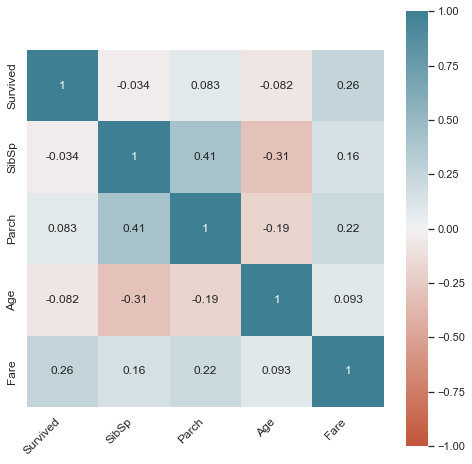

In [22]:
# Let's check how the feature date is correlated with the 'Survived'
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    train[['Survived','SibSp','Parch','Age','Fare']].corr(),
    annot     = True,
    cbar      = True,
    annot_kws = {'size': 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, as_cmap=True),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

- Fare feature seems to have a significant correlation with the survival probability. 
- We need to explore other features more deeply.

### 5.5 Age

In [23]:
# We have some missing information here
test['Age'].isnull().sum()

86

In [24]:
# Let's create a new data frame for visualisation without missing data
# Later we will try to fill that information

age_df = train.copy()
age_df = train.dropna(axis=0, subset=['Age'])
age_df['Age'].isnull().sum()

0

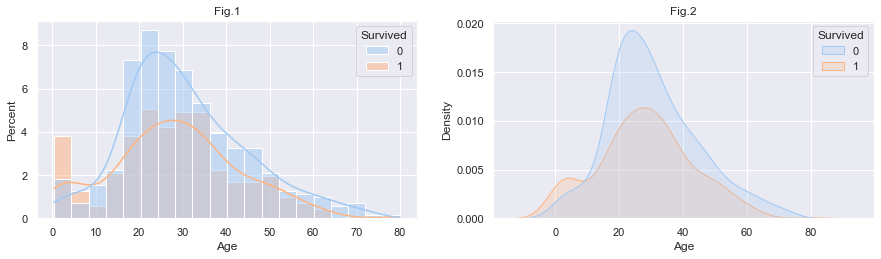

In [25]:
fig = plt.figure(figsize = (15,8))

# Survived distribution for all ages

sub = fig.add_subplot(2,2,1)
chart = sns.histplot(data=age_df, x='Age', 
                     hue='Survived', palette = 'pastel', kde=True, 
                     bins=20,stat='percent').set(title='Fig.1')

sub = fig.add_subplot(2,2,2)
chart = sns.kdeplot(data=age_df, x='Age', shade = True,
                     hue='Survived', palette = 'pastel').set(title='Fig.2')

plt.show()

It looks like that very young passengers have more chance to survive.

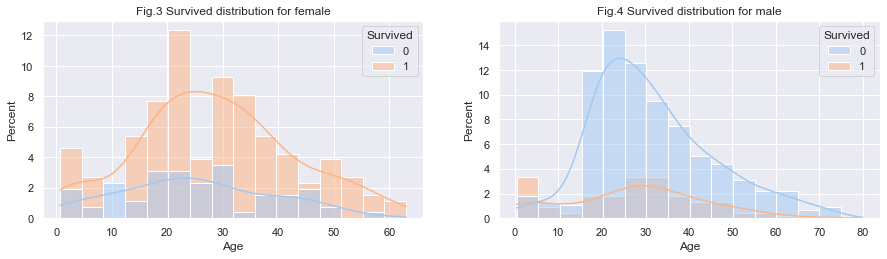

In [26]:
fig = plt.figure(figsize = (15,8))

# Survived distribution for male and female of all ages

sub = fig.add_subplot(2,2,1)
chart = sns.histplot(data=age_df[age_df['Sex']=='female'], x='Age', 
                     hue='Survived', palette = 'pastel',
                     kde=True, bins=16,
                     stat='percent').set(title='Fig.3 Survived distribution for female')

# chart 4: survived distribution for male

sub = fig.add_subplot(2,2,2)
chart = sns.histplot(data=age_df[age_df['Sex']=='male'], x='Age', 
                     hue='Survived', palette = 'pastel', 
                     kde=True, bins=16, 
                     stat='percent').set(title='Fig.4 Survived distribution for male')

plt.show()

It looks like that very young passengers both genders have better chance to survive.

### 5.6 Fare

In [27]:
# Let's check for the missing values
test['Fare'].isnull().sum()

1

In [28]:
# We have only one missing value so let's fill that with the median value
# That will not have an important effect on the prediction.

test['Fare'] = test['Fare'].fillna(test['Fare'].median())

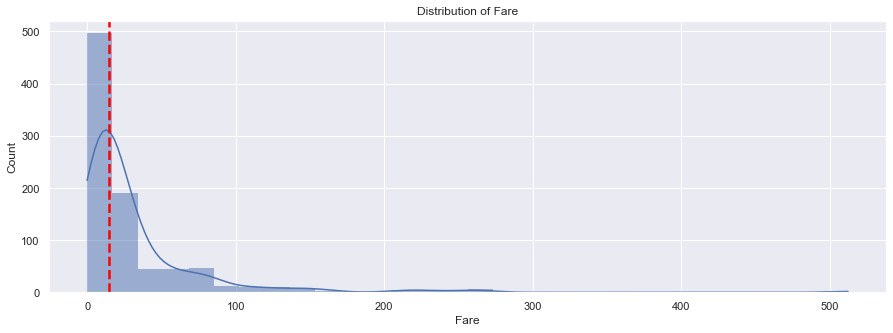

In [29]:
# Let's check the distribution of Fare

plt.figure(figsize=(15, 5))

chart = sns.histplot(x=train.Fare, 
                     palette = 'pastel', 
                     kde=True, bins=30,
                     linewidth=0).set(title='Distribution of Fare')

plt.axvline(x=train.Fare.median(),
            color='red',
            ls='--', 
            lw=2.5,
            )
plt.show()

As we can see, Fare distribution is very skewed. We have also some outliers.

In [30]:
#Let's check how many people payed 250 and more
train[train['Fare'] >= 300].count()

Survived    3
Pclass      3
Name        3
Sex         3
Age         3
SibSp       3
Parch       3
Ticket      3
Fare        3
Embarked    3
dtype: int64

In [31]:
# Since we have only 3 ouliers, let's drop that data from the train set
train = train.sort_values('Fare',ascending=False).iloc[3:]

In [32]:
#Let's check how many people payed 0
train[train['Fare'] == 0].count()

Survived    15
Pclass      15
Name        15
Sex         15
Age          7
SibSp       15
Parch       15
Ticket      15
Fare        15
Embarked    15
dtype: int64

In [33]:
#Let's check who are they. Maybe there is a reason for that e.g. they are kids.

train[train['Fare'] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,S
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,S
823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S


In [34]:
# It looks like random so we can asume that 0 Fare prices are incorrect entries
# The number of entries is not significant so we can fill that with median value

In [35]:
# Filling incorrect entries with median value
train['Fare'].replace(
    to_replace=[0],
    value=train['Fare'].median(),
    inplace=True
)

# The same for the test data
test['Fare'].replace(
    to_replace=[0],
    value=test['Fare'].median(),
    inplace=True
)

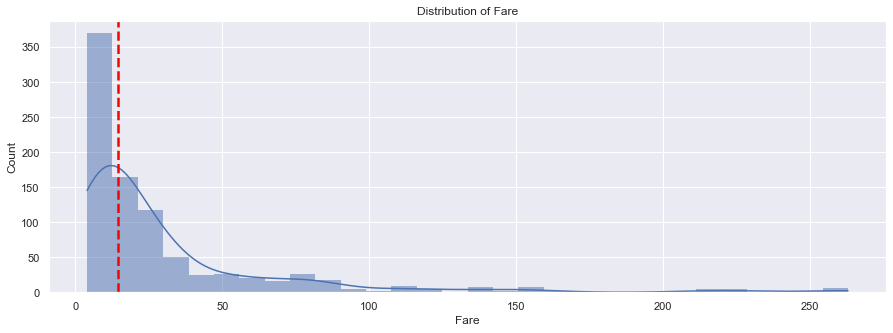

In [36]:
# Let's check the distribution of Fare again

plt.figure(figsize=(15, 5))

chart = sns.histplot(x=train.Fare, 
                     palette = 'pastel', 
                     kde=True, bins=30,
                     linewidth=0).set(title='Distribution of Fare')

plt.axvline(x=train.Fare.median(),
            color='red',
            ls='--', 
            lw=2.5,
            )
plt.show()

The chart is still very skewed it is better to transform it with the log function to reduce this skew. 

In [37]:
# Apply log to Fare to reduce skewness distribution
train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

# and for the test set
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

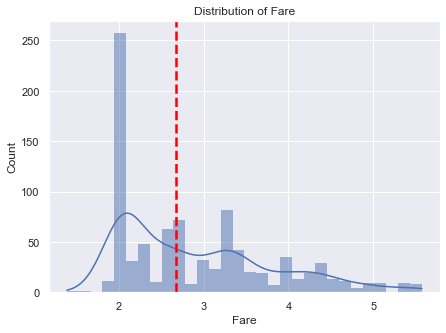

In [38]:
# Let's check the distribution of Fare again

plt.figure(figsize=(7, 5))

chart = sns.histplot(x=train.Fare, 
                     palette = 'pastel', 
                     kde=True, bins=30,
                     linewidth=0).set(title='Distribution of Fare')

plt.axvline(x=train.Fare.median(),
            color='red',
            ls='--', 
            lw=2.5,
            )
plt.show()

Skewness is reduced after the log transformation

### 5.7 SibSP

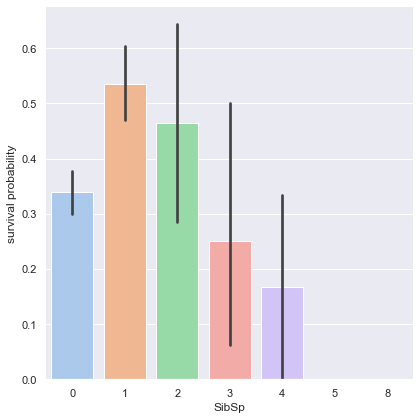

In [39]:
# Explore SibSp feature vs Survived
chart = sns.catplot(x='SibSp',
                    y='Survived',
                    data=train,kind='bar', 
                    height = 6 , 
                    palette = 'pastel')
chart.despine(left=True)
chart = chart.set_ylabels('survival probability')

It looks like passengers having a lot of siblings/spouses have less chance to survive

### 5.8 Parch

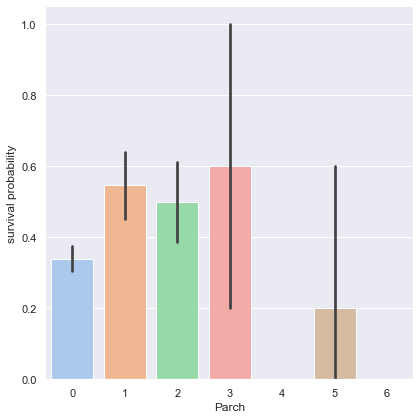

In [40]:
# Explore Parch feature vs Survived
chart  = sns.catplot(x='Parch',
                     y='Survived',
                     data=train, 
                     kind='bar', 
                     height = 6 ,
                     palette = 'pastel')
chart.despine(left=True)
chart = chart.set_ylabels('survival probability')

Small families have more chance to survive

# 6. Further processing and filling missing values

## 6.1 Age

In [41]:
#Let's check and evaluate mean age to fill null values in 'Age' column
mean_age = train['Age'].mean()
print ('Mean age is: ', mean_age)

Mean age is:  29.618011283497882


In [42]:
# Filling column 'Age' with mean value
train['Age'] = train['Age'].fillna(mean_age)
test['Age'] = test['Age'].fillna(mean_age)

In [43]:
# Group Age data

data = [train, test]

for df in data:
    df.loc[df['Age']<=10, 'AgeCategory'] = 'Teenager'
    df.loc[(df['Age']>10), 'AgeCategory'] = 'Other'

## 6.2 Name / Title

In [44]:
train['Name'].head(10)

PassengerId
342                       Fortune, Miss. Alice Elizabeth
28                        Fortune, Mr. Charles Alexander
89                            Fortune, Miss. Mabel Helen
439                                    Fortune, Mr. Mark
312                           Ryerson, Miss. Emily Borie
743                Ryerson, Miss. Susan Parker "Suzette"
300      Baxter, Mrs. James (Helene DeLaudeniere Chaput)
119                             Baxter, Mr. Quigg Edmond
701    Astor, Mrs. John Jacob (Madeleine Talmadge Force)
381                                Bidois, Miss. Rosalie
Name: Name, dtype: object

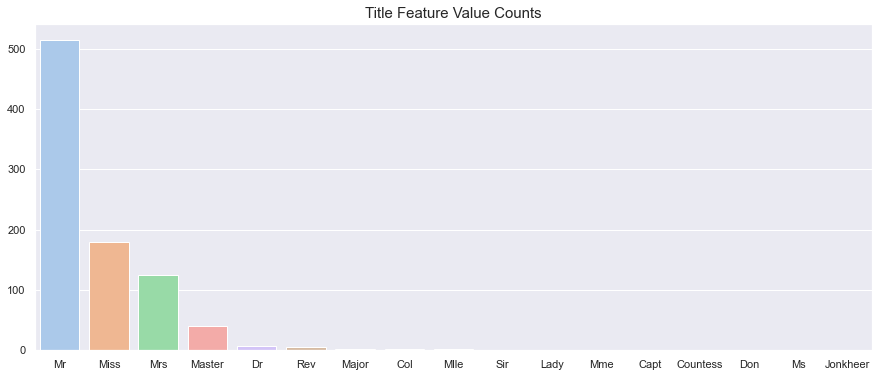

In [45]:
# Get Title from Name

train['Title'] = train['Name'].str.extract(r'([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(r'([A-Za-z]+)\.')

plt.figure(figsize=(15, 6))
sns.barplot(x=train['Title'].value_counts().index,
            y=train['Title'].value_counts().values, 
            palette = 'pastel').set_title('Title Feature Value Counts', size=15)

plt.show()

**CREATING CATEGORIES**

**Mr.** is a title used before a surname or full name of a male, whether he is married or not.

**Miss.** has been a title of respect for a female child and an unmarried woman.
   * Mlle. 'Mademoiselle' is a traditional alternative for an unmarried woman.

**Mrs.** has been a title of respect for a married or widowed woman.
   * Mme. 'Madame' - used as a title equivalent to Mrs. for a married woman not of English-speaking nationality.
   * Dona is a Spanish title of address equivalent to Mrs or Madam.
   * Ms. is the proper way to describe any woman, regardless of marital status (let's add that to the Mrs. group).

**Master.** It is given to male passengers below age 26.

**Rare titles**    
   * Lady used to describe only women of a high social class or status, the equivalent of lord.
   * A Countess is a noblewoman, equal in status to an earl or a count.
   * Other rare titles: Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev.

In [46]:
print('Check missing title passengers:')
display(train.Title.isnull().value_counts())
display('---'*10)

display(test.Title.isnull().value_counts())
display('---'*10)

Check missing title passengers:


False    886
Name: Title, dtype: int64

'------------------------------'

False    418
Name: Title, dtype: int64

'------------------------------'

We have no missing values

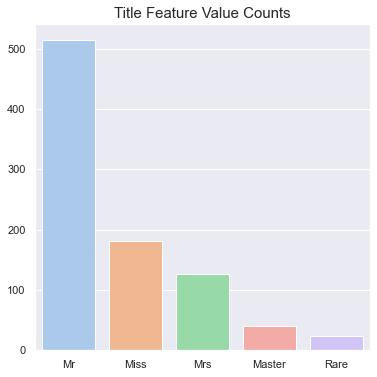

In [47]:
# Convert to categorical values 

data = [train, test]

for df in data:
    df['Title'] = df['Title'].replace(['Miss', 'Mlle'], 'Miss')
    df['Title'] = df['Title'].replace(['Mrs','Ms', 'Mme', 'Dona'], 'Mrs')
    df['Title'] = df['Title'].replace(['Rev', 'Dr', 'Capt', 'Col', 'Sir', 'Major', 'Jonkheer', 'Don', 'Countess', 'Lady'], 'Rare')

plt.figure(figsize=(6, 6))
sns.barplot(x=train['Title'].value_counts().index,
            y=train['Title'].value_counts().values, 
            palette = 'pastel').set_title('Title Feature Value Counts', size=15)

plt.show()

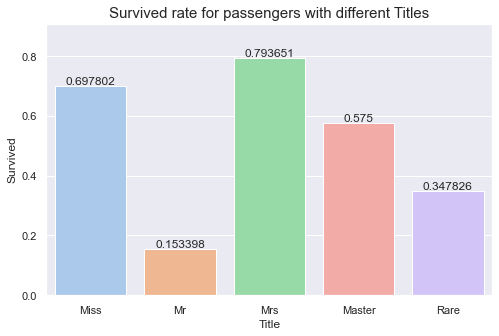

In [48]:
# Check the survival rate for each title

fig = plt.figure(figsize = (8,5))

chart = sns.barplot(x='Title',
                    y='Survived',
                    data = train, 
                    errwidth=0,
                    palette = 'pastel')
chart.bar_label(chart.containers[0])
chart.set_title('Survived rate for passengers with different Titles', size=15)

plt.show()

## 6.3 Family (SibSp and Parch)

Big families probably had more difficult to survive because of because of looking after their kids, brothers and sisters during the evacuation.

In [49]:
# Let's create a new feature which is the sum of SibSp and Parch
# We can add +1 here (passenger), but it's not neceserry 

train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

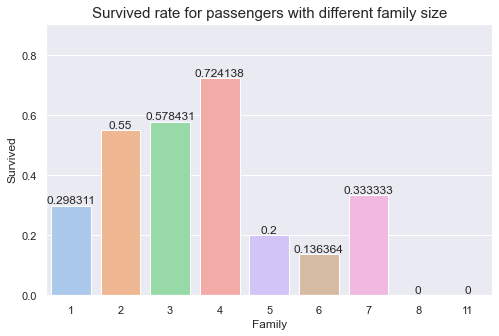

In [50]:
fig = plt.figure(figsize = (8,5))

chart = sns.barplot(x='Family',y='Survived',data = train, errwidth=0,
                    palette = 'pastel')
chart.bar_label(chart.containers[0])
chart.set_title('Survived rate for passengers with different family size', size=15)

plt.show()

In [51]:
# Group Family data

data = [train, test]

for df in data:
    df.loc[df['Family']==1, 'FamilySize'] = 'Single'
    df.loc[(df['Family']>=2) & (df['Family']<=3), 'FamilySize'] = 'Small'
    df.loc[(df['Family']==4) , 'FamilySize'] = 'Medium'
    df.loc[(df['Family']>=5) , 'FamilySize'] = 'Large'

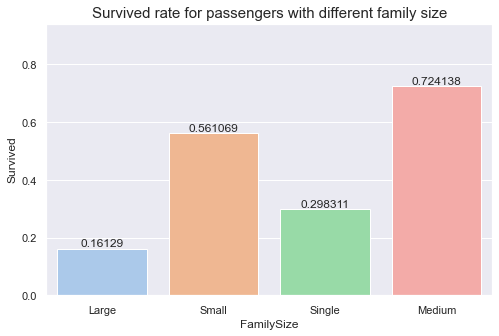

In [52]:
fig = plt.figure(figsize = (8,5))

chart = sns.barplot(x='FamilySize',y='Survived',data = train, errwidth=0,
                    palette = 'pastel')
chart.bar_label(chart.containers[0])
chart.set_title('Survived rate for passengers with different family size', size=15)

plt.show()

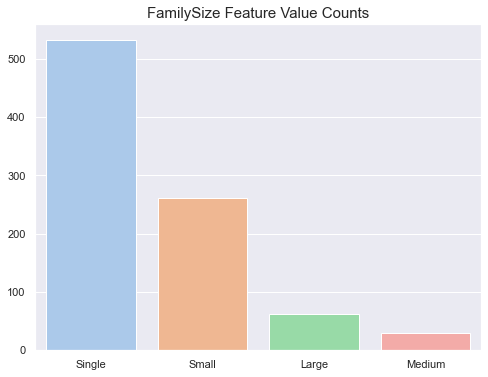

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x=train['FamilySize'].value_counts().index,
            y=train['FamilySize'].value_counts().values, 
            palette = 'pastel').set_title('FamilySize Feature Value Counts', size=15)

plt.show()

We have very few 'Medium' families so we can consider the higher rate of survival here as random. It's better to drop that information.

# 7. Data encoding

In [54]:
print ('Training data shape is ', train.shape )
print ('Test data shape is ', test.shape )

Training data shape is  (886, 14)
Test data shape is  (418, 13)


In [55]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory,Title,Family,FamilySize
count,886.000000,886.000000,886,886,886.000000,886.000000,886.000000,886,886.000000,886,886,886,886.000000,886
unique,NaN,NaN,886,2,NaN,NaN,NaN,679,NaN,3,2,5,NaN,4
top,NaN,NaN,"Fortune, Miss. Alice Elizabeth",male,NaN,NaN,NaN,CA. 2343,NaN,S,Other,Mr,NaN,Single
freq,NaN,NaN,1,575,NaN,NaN,NaN,7,NaN,644,822,515,NaN,533
mean,0.380361,2.316027,NaN,NaN,29.618011,0.525959,0.382619,NaN,2.924380,NaN,NaN,NaN,1.908578,NaN
std,0.485750,0.832607,NaN,NaN,12.986034,1.105151,0.807656,NaN,0.909133,NaN,NaN,NaN,1.616859,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,1.389414,NaN,NaN,NaN,1.000000,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,2.070022,NaN,NaN,NaN,1.000000,NaN
50%,0.000000,3.000000,NaN,NaN,29.618011,0.000000,0.000000,NaN,2.670985,NaN,NaN,NaN,1.000000,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,3.422526,NaN,NaN,NaN,2.000000,NaN


## 7.1 Dropping data

In [56]:
drop_list = ['Name', 'SibSp', 'Parch', 'Ticket', 'Family']
train = train.drop(drop_list, axis=1)
test = test.drop(drop_list, axis=1)

# Check dataset

display(train.head(5))

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeCategory,Title,FamilySize
PassengerId,,,,,,,,,
342,1,1,female,24.0,5.572154,S,Other,Miss,Large
28,0,1,male,19.0,5.572154,S,Other,Mr,Large
89,1,1,female,23.0,5.572154,S,Other,Miss,Large
439,0,1,male,64.0,5.572154,S,Other,Mr,Large
312,1,1,female,18.0,5.569775,C,Other,Miss,Large


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 342 to 598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     886 non-null    int64  
 1   Pclass       886 non-null    int64  
 2   Sex          886 non-null    object 
 3   Age          886 non-null    float64
 4   Fare         886 non-null    float64
 5   Embarked     886 non-null    object 
 6   AgeCategory  886 non-null    object 
 7   Title        886 non-null    object 
 8   FamilySize   886 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 69.2+ KB


We have columns that need encoding: 'Sex', 'Embarked', 'AgeCAtegory', 'Title' and 'FamilySize. We will create dummies and convert them from object to integer.

## 7.2 Create Dummies

In [58]:
train['Sex'] = train['Sex'].factorize(['female','male'])[0]
test['Sex'] = test['Sex'].factorize(['female','male'])[0]

train['Sex'].value_counts()

1    575
0    311
Name: Sex, dtype: int64

In [59]:
dummy_columns = ['Embarked','Title','FamilySize', 'AgeCategory']

train_dummies = pd.get_dummies(data = train, columns = dummy_columns)
test_dummies = pd.get_dummies(data = test, columns = dummy_columns)

In [60]:
train_dummies.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_Large,FamilySize_Medium,FamilySize_Single,FamilySize_Small,AgeCategory_Other,AgeCategory_Teenager
PassengerId,,,,,,,,,,,,,,,,,,,
342,1,1,0,24.0,5.572154,0,0,1,0,1,0,0,0,1,0,0,0,1,0
28,0,1,1,19.0,5.572154,0,0,1,0,0,1,0,0,1,0,0,0,1,0
89,1,1,0,23.0,5.572154,0,0,1,0,1,0,0,0,1,0,0,0,1,0
439,0,1,1,64.0,5.572154,0,0,1,0,0,1,0,0,1,0,0,0,1,0
312,1,1,0,18.0,5.569775,1,0,0,0,1,0,0,0,1,0,0,0,1,0
743,1,1,0,21.0,5.569775,1,0,0,0,1,0,0,0,1,0,0,0,1,0
300,1,1,0,50.0,5.511495,1,0,0,0,0,0,1,0,0,0,0,1,1,0
119,0,1,1,24.0,5.511495,1,0,0,0,0,1,0,0,0,0,0,1,1,0
701,1,1,0,18.0,5.427260,1,0,0,0,0,0,1,0,0,0,0,1,1,0


In [61]:
display(train_dummies.shape, test_dummies.shape)

(886, 19)

(418, 18)

## 7.3 Some visualisations after transformations

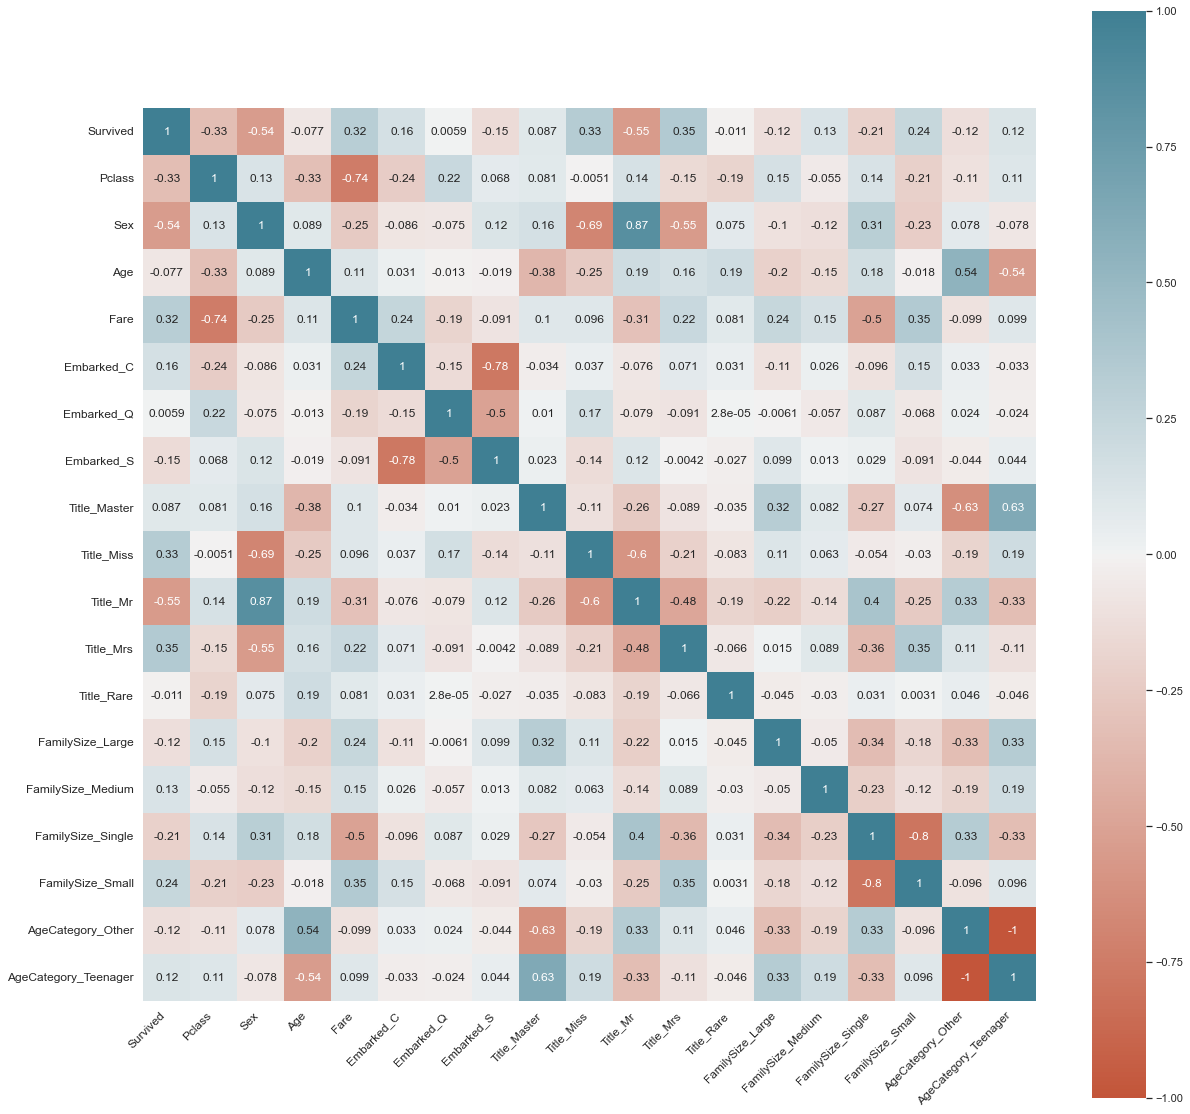

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

sns.heatmap(
    train_dummies.corr(),
    annot     = True,
    cbar      = True,
    annot_kws = {'size': 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, as_cmap=True),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

In [63]:
# Sorting Survived correlation
train_dummies.corr()['Survived'].sort_values()

Title_Mr               -0.550813
Sex                    -0.544129
Pclass                 -0.331075
FamilySize_Single      -0.207676
Embarked_S             -0.145849
FamilySize_Large       -0.123780
AgeCategory_Other      -0.122647
Age                    -0.076571
Title_Rare             -0.010941
Embarked_Q              0.005878
Title_Master            0.087178
AgeCategory_Teenager    0.122647
FamilySize_Medium       0.130262
Embarked_C              0.162681
FamilySize_Small        0.241194
Fare                    0.315946
Title_Miss              0.332464
Title_Mrs               0.346630
Survived                1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

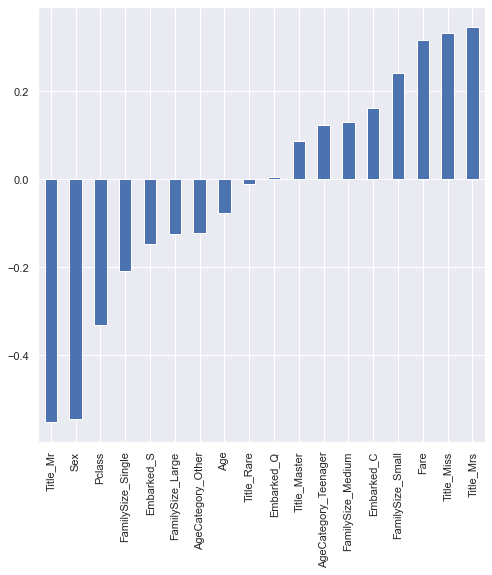

In [64]:
# Let's print that chart again without 'Survival' feature
plt.figure(figsize=(8,8))
train_dummies.corr()['Survived'][1:].sort_values().plot(kind='bar')

In [65]:
drop_list = ['Age', 'Embarked_Q', 'Embarked_S', 'Embarked_C', 'FamilySize_Medium', 'AgeCategory_Other', 'Fare']
train_dummies = train_dummies.drop(drop_list, axis=1)
test_dummies = test_dummies.drop(drop_list, axis=1)

# Check dataset

display(train_dummies.head(5))

,Survived,Pclass,Sex,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,FamilySize_Large,FamilySize_Single,FamilySize_Small,AgeCategory_Teenager
PassengerId,,,,,,,,,,,,
342,1,1,0,0,1,0,0,0,1,0,0,0
28,0,1,1,0,0,1,0,0,1,0,0,0
89,1,1,0,0,1,0,0,0,1,0,0,0
439,0,1,1,0,0,1,0,0,1,0,0,0
312,1,1,0,0,1,0,0,0,1,0,0,0


In [66]:
display(train_dummies.shape, test_dummies.shape)

(886, 12)

(418, 11)

## 7.4 Train Test Split

In [67]:
X = train_dummies.drop('Survived',axis=1).values
y = train_dummies['Survived'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

## 7.5 Scaling Data

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [69]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 8. Creating the Model

For a binary classification problem:
    
       model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [71]:
X_train.shape

(664, 11)

In [72]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=11,activation='relu'))
model.add(Dropout(0.2))

#model.add(Dense(units=11,activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=8,activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=7,activation='sigmoid'))
#model.add(Dropout(0.1))

#model.add(Dense(units=3,activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=4,activation='sigmoid'))
#model.add(Dropout(0.1))

#model.add(Dense(units=2,activation='sigmoid'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

# 9. Training the Model

In [73]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{'auto', 'min', 'max'}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [74]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=3000,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/3000
21/21 [==============================] - 1s 12ms/step - loss: 0.6956 - val_loss: 0.6952
Epoch 2/3000
21/21 [==============================] - 0s 3ms/step - loss: 0.6819 - val_loss: 0.6863
Epoch 3/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6717 - val_loss: 0.6788
Epoch 4/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6618 - val_loss: 0.6721
Epoch 5/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6521 - val_loss: 0.6661
Epoch 6/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6459 - val_loss: 0.6602
Epoch 7/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6390 - val_loss: 0.6544
Epoch 8/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6320 - val_loss: 0.6485
Epoch 9/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.6261 - val_loss: 0.6422
Epoch 10/3000
21/21 [==============================] - 0s 3ms/step - loss: 0.6213 - val_loss: 0.635

21/21 [==============================] - 0s 2ms/step - loss: 0.4186 - val_loss: 0.4149
Epoch 83/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4245 - val_loss: 0.4132
Epoch 84/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4337 - val_loss: 0.4124
Epoch 85/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4153 - val_loss: 0.4113
Epoch 86/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4230 - val_loss: 0.4109
Epoch 87/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4151 - val_loss: 0.4110
Epoch 88/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4280 - val_loss: 0.4102
Epoch 89/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4219 - val_loss: 0.4097
Epoch 90/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4190 - val_loss: 0.4088
Epoch 91/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4261 - val_loss: 0.4084
Epoc

21/21 [==============================] - 0s 2ms/step - loss: 0.3965 - val_loss: 0.3941
Epoch 163/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4042 - val_loss: 0.3935
Epoch 164/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4050 - val_loss: 0.3942
Epoch 165/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4108 - val_loss: 0.3938
Epoch 166/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3992 - val_loss: 0.3943
Epoch 167/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4050 - val_loss: 0.3942
Epoch 168/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3988 - val_loss: 0.3946
Epoch 169/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3992 - val_loss: 0.3945
Epoch 170/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4008 - val_loss: 0.3948
Epoch 171/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4052 - val_loss: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.4019 - val_loss: 0.3925
Epoch 243/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3957 - val_loss: 0.3920
Epoch 244/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3958 - val_loss: 0.3917
Epoch 245/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3982 - val_loss: 0.3918
Epoch 246/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3885 - val_loss: 0.3915
Epoch 247/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3969 - val_loss: 0.3916
Epoch 248/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3954 - val_loss: 0.3916
Epoch 249/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3980 - val_loss: 0.3921
Epoch 250/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3984 - val_loss: 0.3914
Epoch 251/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3979 - val_loss: 0.

21/21 [==============================] - 0s 2ms/step - loss: 0.3875 - val_loss: 0.3898
Epoch 323/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3910 - val_loss: 0.3893
Epoch 324/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3974 - val_loss: 0.3894
Epoch 325/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3925 - val_loss: 0.3897
Epoch 326/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.4005 - val_loss: 0.3902
Epoch 327/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3921 - val_loss: 0.3900
Epoch 328/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3950 - val_loss: 0.3899
Epoch 329/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3859 - val_loss: 0.3896
Epoch 330/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3893 - val_loss: 0.3897
Epoch 331/3000
21/21 [==============================] - 0s 2ms/step - loss: 0.3910 - val_loss: 0.

<AxesSubplot:>

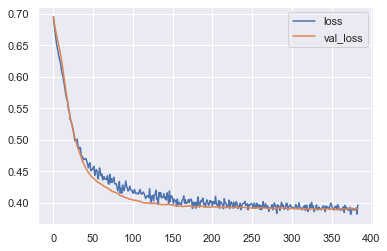

In [75]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 10. Model Evaluation

In [76]:
predictions = (model.predict(X_test) > 0.5)*1

7/7 [==============================] - 0s 804us/step


In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       130
           1       0.85      0.76      0.80        92

    accuracy                           0.85       222
   macro avg       0.85      0.83      0.84       222
weighted avg       0.85      0.85      0.85       222



In [79]:
print(confusion_matrix(y_test,predictions))

[[118  12]
 [ 22  70]]


In [80]:
cm_df = pd.DataFrame(confusion_matrix(y_test,predictions))
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,118,12
Actual 1,22,70


In [81]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8468468468468469

In [82]:
# It it worth to remind here that survival rate is 61,6%, so the blind guess will be around 62%. > 80% is a great result!

# 11. Final Predictions

In [83]:
#Scaling test data
scaler.fit(test_dummies)
final_test_df = scaler.transform(test_dummies)

In [84]:
model.predict(final_test_df)

14/14 [==============================] - 0s 668us/step


array([[0.09105315],
       [0.534046  ],
       [0.11155775],
       [0.09105315],
       [0.534046  ],
       [0.09105315],
       [0.57079834],
       [0.11237545],
       [0.8009052 ],
       [0.09117085],
       [0.09105315],
       [0.27132142],
       [0.9631942 ],
       [0.11237545],
       [0.9631942 ],
       [0.9420484 ],
       [0.11155775],
       [0.09105315],
       [0.46924478],
       [0.8009052 ],
       [0.3874519 ],
       [0.958756  ],
       [0.9637672 ],
       [0.3874519 ],
       [0.9581453 ],
       [0.09117085],
       [0.96149796],
       [0.09105315],
       [0.27132142],
       [0.09117085],
       [0.11237545],
       [0.11237545],
       [0.6899466 ],
       [0.6899466 ],
       [0.3874519 ],
       [0.09105315],
       [0.57079834],
       [0.57079834],
       [0.09105315],
       [0.09105315],
       [0.09117085],
       [0.27132142],
       [0.09105315],
       [0.94808704],
       [0.9631942 ],
       [0.09105315],
       [0.27132142],
       [0.091

In [85]:
# make predictions on the entire training dataset
yhat = (model.predict(final_test_df) > 0.5)*1

14/14 [==============================] - 0s 607us/step


# 12. Preparing Submission File

In [86]:
#yhat is an array with arrays inside of it so not a 1d vector. We need to use yhat.flatten to flatten it to a 1d array:

yhat = yhat.flatten()

In [87]:
# connect predictions with outputs and create a file

my_submission = pd.DataFrame({
    'PassengerId': raw_test['PassengerId'], 
    'Survived': yhat})

my_submission.to_csv('submission.csv', index=False)

In [88]:
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
